<a href="https://colab.research.google.com/github/MohdSharik99/Capstone-Project-HEALTH-INSURANCE-CROSS-SELL-PREDICTION---Classification/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [2]:
# ! pip uninstall matplotlib
! pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [247]:

# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [5]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [127]:
initial_df  =  pd.read_csv('/content/drive/MyDrive/Alma better/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [128]:
# creating a copy of the given data 
df = initial_df.copy()

In [129]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [130]:
# getting basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [131]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [132]:
# checking for unique value in each column
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [133]:
# Dropping id column
df = df.drop('id', axis =1)

In [134]:
# describing the dataset for numerical features
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [135]:
# describing the data for categoical features
df.describe(include = 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## EDA

## Univariate analysis

In [136]:
# Let's start with the taget feature i.e response column
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### analysis on gender

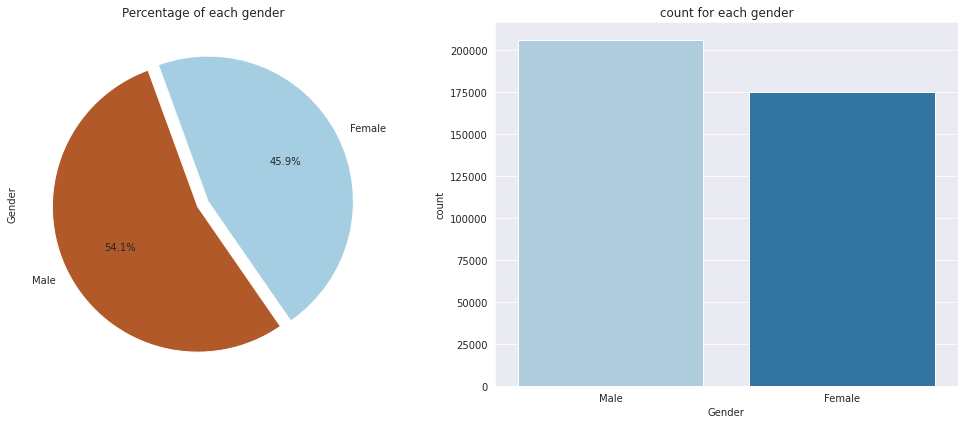

In [137]:
# analysis on age

fig , axes  = plt.subplots(1,2,figsize = (14,6 ))
df['Gender'].value_counts().plot.pie( autopct = '%.1f%%', explode = [0.04,0.04], startangle = 110, cmap = 'Paired_r', ax = axes[0])
axes[0].set_title('Percentage of each gender')

sns.countplot(data = df , x = 'Gender', palette = 'Paired', ax =  axes[1])
axes[1].set_title('count for each gender')


plt.tight_layout()

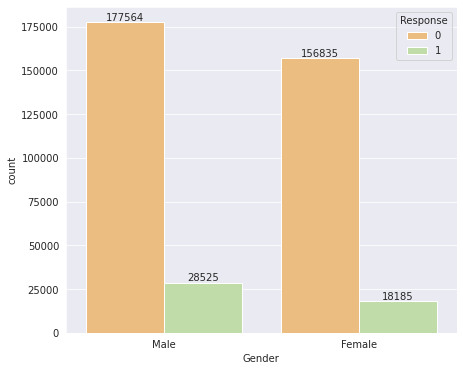

In [138]:
# Age vs Response
sns.set_style('darkgrid')
plt.figure(figsize = (7,6))
ax = sns.countplot(data = df , x = 'Gender', palette = 'Spectral', hue = 'Response')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')
plt.show()




### Age

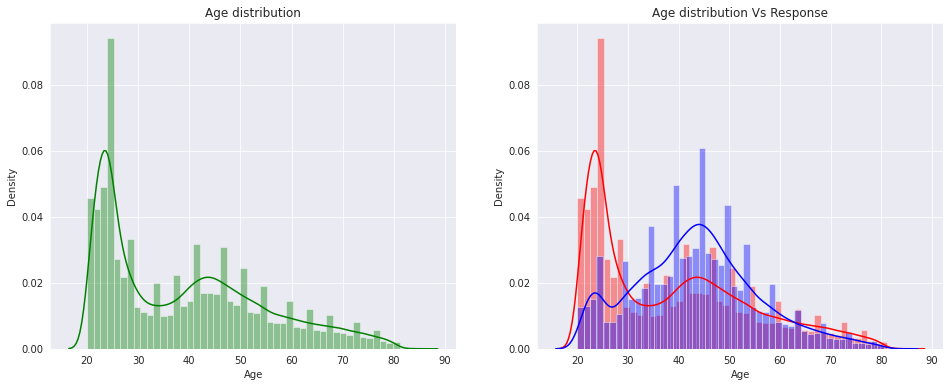

<Figure size 432x288 with 0 Axes>

In [139]:
## Age distribution

fig, axes = plt.subplots( 1,2 , figsize = (16,6))
sns.distplot( x= df['Age'], color= 'g', ax =axes[0])
axes[0].set_title('Age distribution')
axes[0].set_xlabel('Age')


sns.distplot( x= df['Age'], color= 'r', ax =axes[1])
sns.distplot( x= df.Age[df['Response'] == 1], color= 'b', ax =axes[1])
axes[1].set_title('Age distribution Vs Response')
axes[1].set_xlabel('Age')

plt.show()
plt.tight_layout()

## Region code

In [140]:
df['Region_Code'].max()

52.0

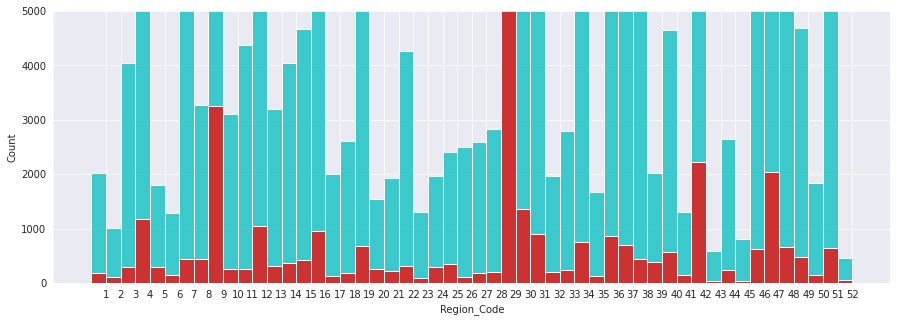

In [141]:
# converting reason code into str
plt.figure(figsize = (15,5))

ticks = list(range(1,53))


df['Region_Code'] = df['Region_Code'].astype(int) 
sns.histplot( x= df['Region_Code'], color = 'c', bins =52)
sns.histplot( x= df['Region_Code'][df['Response'] ==1 ],  color = 'r', bins =52)

plt.ylim(0,5000)
plt.xticks(ticks)
plt.show()


In [142]:
df['Driving_License'].value_counts()



1    380297
0       812
Name: Driving_License, dtype: int64

## Vehicle Age

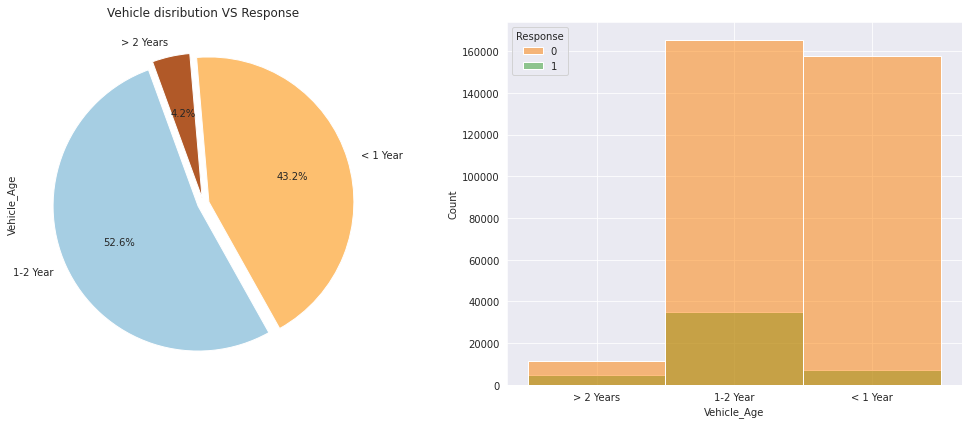

In [143]:


fig , axes  = plt.subplots(1,2,figsize = (14,6 ))
df['Vehicle_Age'].value_counts().plot.pie( autopct = '%.1f%%', explode = [0.04,0.04, 0.04], startangle = 110, cmap = 'Paired', ax = axes[0])
axes[0].set_title('Vehicle disribution')


sns.histplot(data= df, x = 'Vehicle_Age', hue= df['Response'], palette='Paired_r')
axes[0].set_title('Vehicle disribution VS Response')

plt.tight_layout()
plt.show()



### Vehicle damage

,Vehicle_Damage
Yes,192413
No,188696


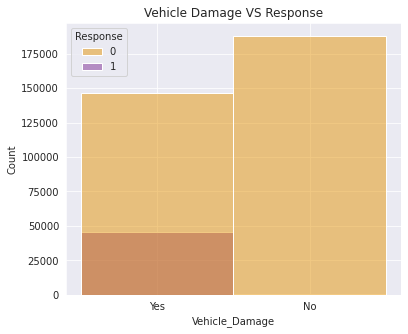

In [144]:

plt.figure(figsize= (6,5))
sns.histplot(data = df, x= 'Vehicle_Damage', hue= df['Response'], palette = 'CMRmap_r')
plt.title('Vehicle Damage VS Response')

pd.DataFrame(df.groupby('Vehicle_Damage')['Response'].sum())
pd.DataFrame(df['Vehicle_Damage'].value_counts())


## Annual Premium

(0.0, 50000.0)

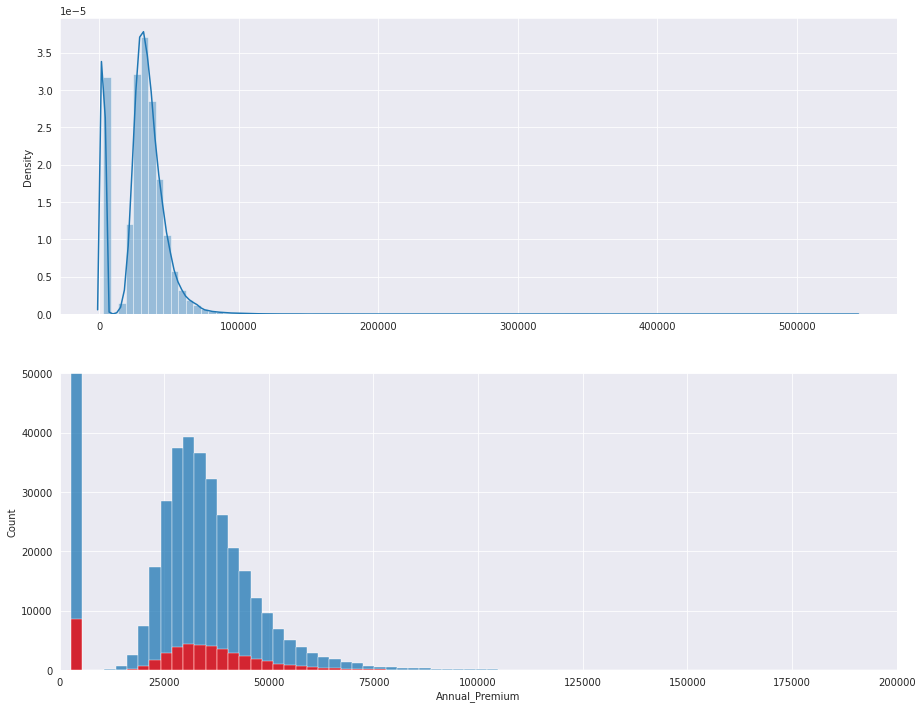

In [145]:
fig, axes = plt.subplots(2,1, figsize =( 15,12))

sns.distplot( x= df['Annual_Premium'], ax = axes[0], bins = 100)


sns.histplot( x= df['Annual_Premium'], ax = axes[1], bins = 200)
sns.histplot( x= df['Annual_Premium'][df['Response'] == 1], ax = axes[1], bins = 200, color = 'r')
axes[1].set_xlim(0,200000)
axes[1].set_ylim(0,50000)

## Policy_sales channel

In [146]:
# Policy sales chanel analysis
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)

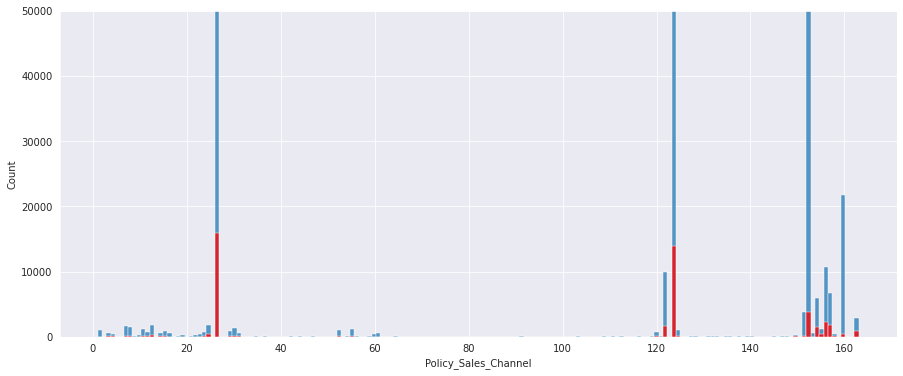

,index,Policy_Sales_Channel,Response
0,152,134784,3858
1,26,79700,15891
2,124,73995,13996
3,160,21779,475
4,156,10661,2297
5,122,9930,1720
6,157,6684,1794
7,154,5993,1474
8,151,3885,122
9,163,2893,880


In [147]:

plt.figure(figsize = ( 15, 6))

sns.histplot( x= df['Policy_Sales_Channel'], bins = 175)
sns.histplot( x= df['Policy_Sales_Channel'][df['Response'] == 1], bins = 175, color = 'r')

plt.ylim(0,50000)
plt.show()

sub_df1 = pd.DataFrame(df['Policy_Sales_Channel'].value_counts()).head(10).reset_index()
sub_df2 = pd.DataFrame(df.groupby('Policy_Sales_Channel')['Response'].sum()).reset_index()
sub_df2.rename(columns = {'Policy_Sales_Channel' : 'index'}, inplace = True)
top_channels = pd.merge(sub_df1 , sub_df2, on = 'index', how = 'left')
top_channels

In [148]:
sub_df2 = pd.DataFrame(df.groupby('Policy_Sales_Channel')['Response'].sum()).reset_index()
sub_df2.rename(columns = {'Policy_Sales_Channel' : 'index'}, inplace = True)

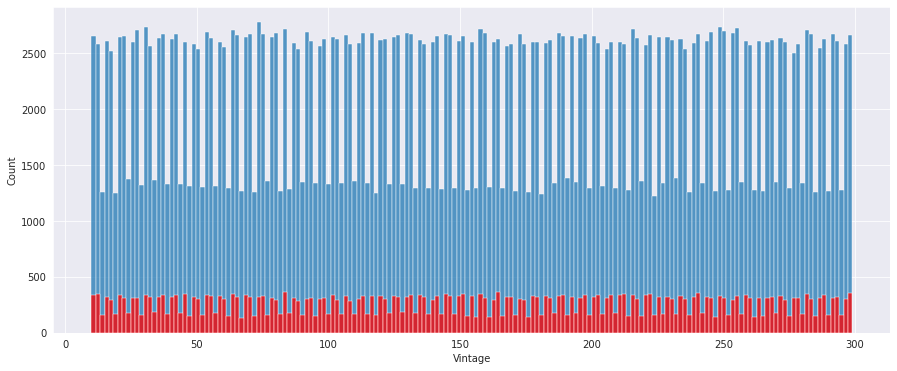

In [149]:
# Vintage analysis

plt.figure(figsize = ( 15, 6))


sns.histplot( x= df['Vintage'], bins = 175)
sns.histplot( x= df['Vintage'][df['Response'] == 1], bins = 175, color = 'r')

plt.show()

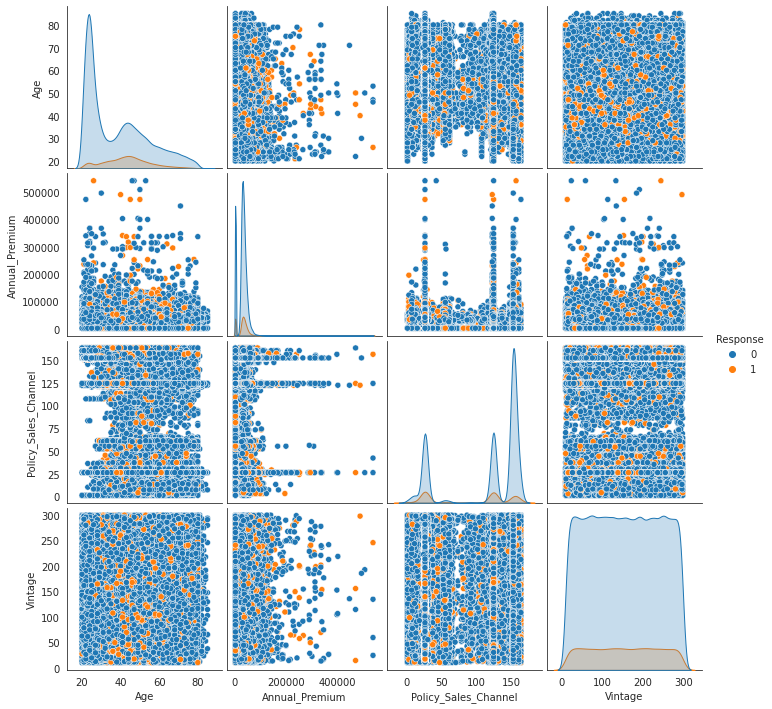

In [255]:
# plotting pairplot
sns.pairplot(df[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']], hue= 'Response')
plt.show()

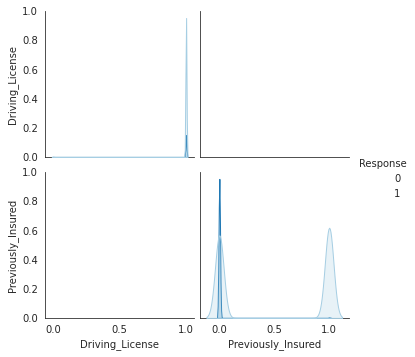

In [258]:
sns.pairplot(df[['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Response']], hue= 'Response', palette = 'Paired', kind ='bar')
plt.show()

In [256]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

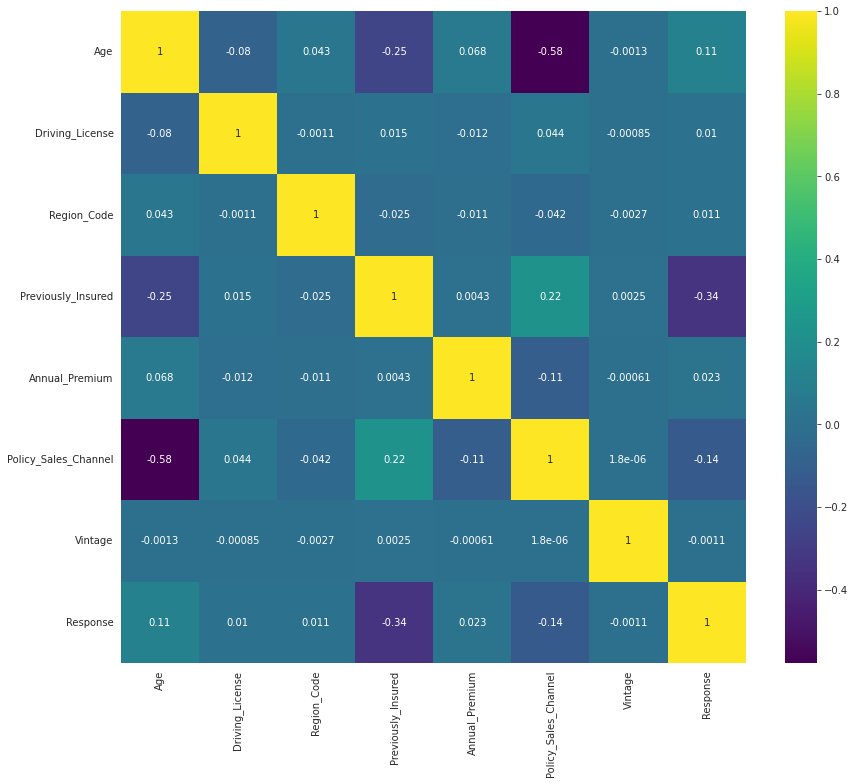

In [150]:
# Correlation
plt.figure(figsize = (14,12))
sns.heatmap(df.corr(), annot = True,  cmap = 'viridis')
plt.show()

In [151]:
def bin_func(i):
  if i < 21:
    return 'Region1'
  elif i>= 21 and i <31:
    return 'Region2'
  elif i>= 31 and i <40:
    return 'Region3'
  else:
    return 'Region4'


In [152]:
df['Region_Code'] = df['Region_Code'].apply(bin_func)

In [153]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,Region2,0,> 2 Years,Yes,40454.0,26,217,1
1,Male,76,1,Region1,0,1-2 Year,No,33536.0,26,183,0
2,Male,47,1,Region2,0,> 2 Years,Yes,38294.0,26,27,1
3,Male,21,1,Region1,1,< 1 Year,No,28619.0,152,203,0
4,Female,29,1,Region4,1,< 1 Year,No,27496.0,152,39,0


## Splitting the data set 

In [154]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [155]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [156]:
# df = pd.get_dummies(df)

In [157]:
# from imblearn.over_sampling import SMOTE

# sm=SMOTE()
# X,y=sm.fit_resample(df.iloc[:,:10],df.iloc[:,10])


In [158]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [201]:
def scale(dataset): 
  cat_feature_df =  dataset[['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
        'Vehicle_Age', 'Vehicle_Damage']]
  cat_feature_df = cat_feature_df.reset_index()

  encoded_columns =    pd.get_dummies(cat_feature_df, drop_first =True)


  numeric_feature_df = dataset[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

  sc = StandardScaler()
  df1 =  pd.DataFrame(sc.fit_transform(numeric_feature_df), columns = ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'])
  scaled_df = pd.concat([df1, encoded_columns], axis = 1)
  # scaled_df = scaled_df[dataset.columns]
  return scaled_df


In [202]:
scale(X_train)

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,index,Driving_License,Previously_Insured,Gender_Male,Region_Code_Region2,Region_Code_Region3,Region_Code_Region4,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,-1.150179,-0.350209,0.738259,0.570345,247288,1,1,1,0,0,1,1,0,0
1,2.331493,12.837651,0.222000,-0.828335,88242,1,1,0,1,0,0,0,0,1
2,0.784083,2.264343,0.222000,-0.015427,312678,1,0,1,1,0,0,0,0,1
3,-1.085704,0.522275,0.738259,-1.318471,218264,1,1,1,1,0,0,1,0,0
4,-1.021228,-0.182604,0.738259,0.642073,88838,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285826,-0.956753,-0.463860,0.738259,1.586481,259178,1,1,0,0,1,0,1,0,0
285827,1.106460,0.621713,0.222000,1.717981,365838,1,0,1,0,1,0,0,0,1
285828,-1.085704,-0.679559,0.738259,-0.935926,131932,1,0,0,0,0,0,1,0,1
285829,0.332755,-1.620964,0.812010,-1.234789,146867,1,1,1,0,1,0,0,0,1


In [168]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
247288,Male,21,1,Region4,1,< 1 Year,No,24534.0,152,202
88242,Female,75,1,Region2,1,1-2 Year,Yes,251853.0,124,85
312678,Male,51,1,Region2,0,1-2 Year,Yes,69601.0,124,153
218264,Male,22,1,Region2,1,< 1 Year,No,39573.0,152,44
88838,Male,23,1,Region2,1,< 1 Year,No,27423.0,152,208
...,...,...,...,...,...,...,...,...,...,...
259178,Female,24,1,Region3,1,< 1 Year,No,22575.0,152,287
365838,Male,56,1,Region3,0,1-2 Year,Yes,41287.0,124,298
131932,Female,22,1,Region1,0,< 1 Year,Yes,18857.0,152,76
146867,Male,44,1,Region3,1,1-2 Year,Yes,2630.0,156,51


## Applying one hot encoding 

In [232]:
Scaled_X_train = scale(X_train)
Scaled_X_test = scale(X_test)

In [210]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.

counter = Counter(y_train)
print('Before oversmapling', counter )
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(Scaled_X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

counter = Counter(oversampled_Y)
print('after oversmapling', counter )


Before oversmapling Counter({0: 250886, 1: 34945})
after oversmapling Counter({0: 250886, 1: 250886})


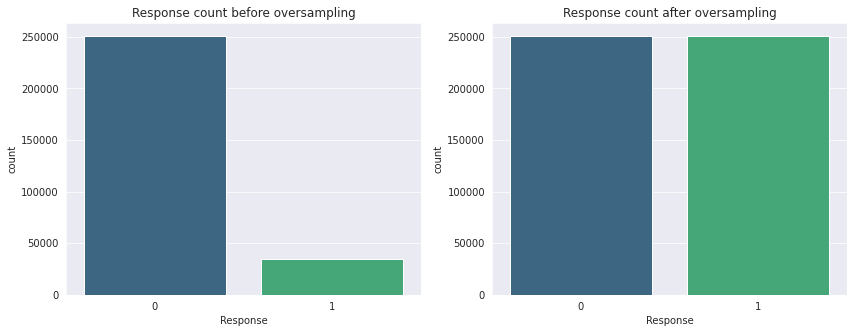

In [218]:
fig, axes = plt.subplots(1,2, figsize = (14,5))


sns.countplot(data = y_train, x = y_train, ax = axes[0], palette = 'viridis')
sns.countplot(data = oversampled, x = oversampled_Y, ax = axes[1], palette = 'viridis')

axes[0].set_title('Response count before oversampling')
axes[1].set_title('Response count after oversampling')

plt.show()

## ML Models

In [226]:
from sklearn.tree import DecisionTreeClassifier

model1 =  DecisionTreeClassifier(random_state = 42)

params = {'max_depth' : [5,6,7,8,9,10]}

best_d_model = GridSearchCV(model1, param_grid = params , verbose=1 , cv = 10, return_train_score= True)

best_d_model.fit(oversampled_X,oversampled_Y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, verbose=1)

In [227]:
best_d_model.best_params_

{'max_depth': 10}

In [235]:
d_model = DecisionTreeClassifier(random_state = 42, max_depth= 10)

d_model.fit(oversampled_X,oversampled_Y)

d_preds = d_model.predict(Scaled_X_test)

In [265]:
list(d_model.predict_proba(Scaled_X_test)[:10])
 

[array([1., 0.]),
 array([0.24384347, 0.75615653]),
 array([0.53571429, 0.46428571]),
 array([0., 1.]),
 array([0.78935939, 0.21064061]),
 array([1., 0.]),
 array([0.24384347, 0.75615653]),
 array([9.99918534e-01, 8.14663951e-05]),
 array([0.65103448, 0.34896552]),
 array([0.32757072, 0.67242928])]

In [236]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [241]:
confusion_matrix(y_test,d_preds)




array([[60718, 22795],
       [ 4132,  7633]])

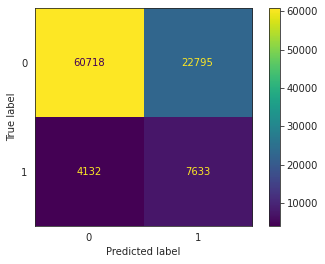

In [244]:
sns.set_style('white')
plot_confusion_matrix(d_model,Scaled_X_test,y_test)

In [246]:
print(classification_report(y_test,d_preds))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     83513
           1       0.25      0.65      0.36     11765

    accuracy                           0.72     95278
   macro avg       0.59      0.69      0.59     95278
weighted avg       0.85      0.72      0.76     95278



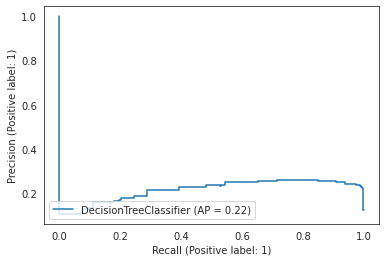

In [249]:
plot_precision_recall_curve(d_model,Scaled_X_test,y_test)

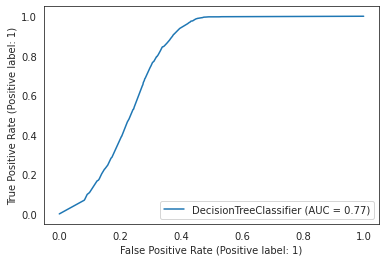

In [251]:
plot_roc_curve(d_model,Scaled_X_test,y_test)

## Logistic regression